In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
import time

In [2]:
data = pd.read_csv("GOOG.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4853,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700
4854,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500
4855,2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400
4856,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100


In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4.858000e+03
mean,41.477174,41.917059,41.055491,41.494404,41.494404,1.189152e+08
std,38.590695,39.031758,38.193016,38.618107,38.618107,1.512424e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.846597,12.954195,12.712414,12.834642,12.834642,2.854912e+07
50%,26.499958,26.728268,26.289323,26.537501,26.537501,6.168836e+07
75%,57.367250,58.028500,56.962251,57.611249,57.611249,1.467329e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [4]:
data.size

34006

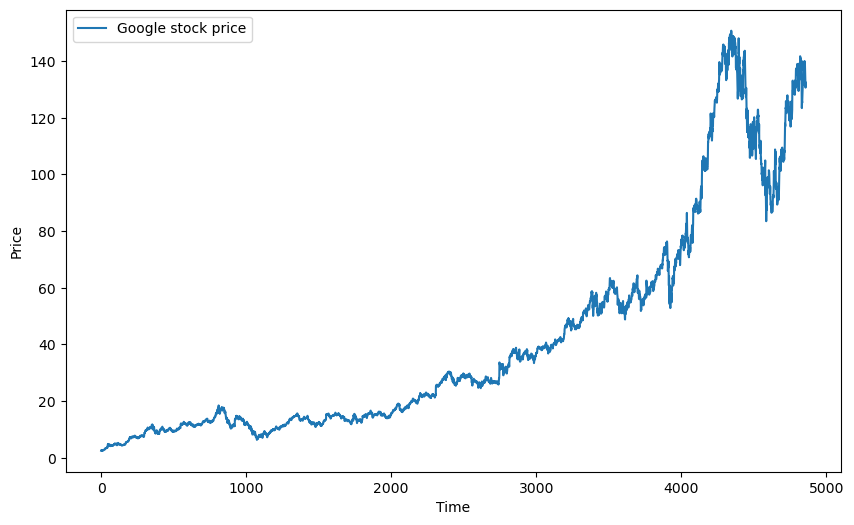

In [11]:
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Google stock price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_values = scaler.fit_transform(np.array(data['Close']).reshape(-1,1))

In [17]:
train_size = int(len(scaled_values)*0.8)
train_data = scaled_values[:train_size]
test_data = scaled_values[train_size:]

In [18]:
# Function to create dataset with time steps
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [19]:
# Define time steps and create train and test datasets
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [20]:
# Reshape data for LSTM input [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50),
    Dense(1)
])

/home/mahesh/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
# Measure training time
start_time = time.time()

In [26]:
# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0050 - val_loss: 0.0011
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 5.1215e-05 - val_loss: 0.0012
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.1577e-05 - val_loss: 0.0011
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 4.4043e-05 - val_loss: 0.0014
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.9239e-05 - val_loss: 0.0014
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.7842e-05 - val_loss: 0.0013
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 4.2870e-05 - val_loss: 0.0013
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 4.6253e-05 - val_loss: 0.0019
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.7749e-05 - val_loss: 0.0012
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.1389e-05 - val_loss: 0.0024
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.0913e-05 - val_loss: 0.0010
Epoch 12/50
60/60 ━━━━━

In [27]:
training_time = time.time() - start_time
print("Training Time:", training_time, "seconds")

Training Time: 278.5820949077606 seconds


In [28]:
# Evaluate model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print('Train Loss:', train_loss)
print('Test Loss:', test_loss)

Train Loss: 1.9000943211722188e-05
Test Loss: 0.00047223674482665956


In [29]:
# Measure prediction time
start_time = time.time()

In [30]:
# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [31]:
prediction_time = time.time() - start_time
print("Prediction Time:", prediction_time, "seconds")

Prediction Time: 36.64893913269043 seconds


In [32]:
# Inverse scaling to get original stock prices
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

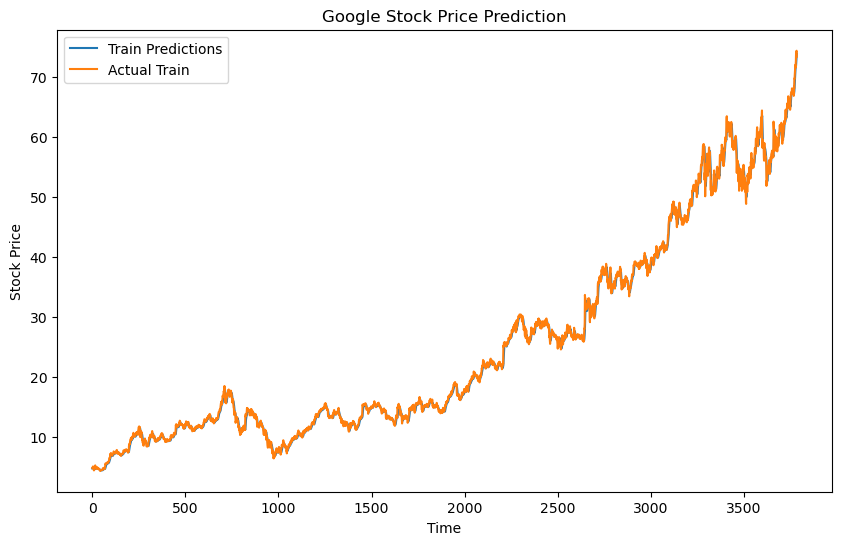

In [33]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index[:len(train_predictions)], train_predictions, label='Train Predictions')
#plt.plot(data.index[len(train_predictions)+time_step:len(train_predictions)+time_step+len(test_predictions)], test_predictions, label='Test Predictions')
plt.plot(data.index[:len(y_train.flatten())], y_train.flatten(), label='Actual Train')
#plt.plot(data.index[len(y_train.flatten())+time_step:len(y_train.flatten())+time_step+len(y_test.flatten())], y_test.flatten(), label='Actual Test')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()

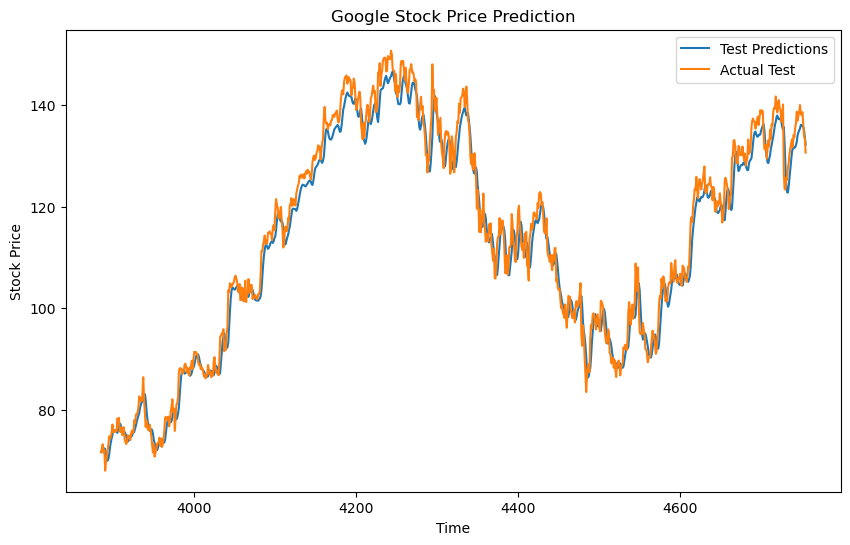

In [35]:
# Plot predictions
plt.figure(figsize=(10, 6))
#plt.plot(data.index[:len(train_predictions)], train_predictions, label='Train Predictions')
plt.plot(data.index[len(train_predictions)+time_step:len(train_predictions)+time_step+len(test_predictions)], test_predictions, label='Test Predictions')
#plt.plot(data.index[:len(y_train.flatten())], y_train.flatten(), label='Actual Train')
plt.plot(data.index[len(y_train.flatten())+time_step:len(y_train.flatten())+time_step+len(y_test.flatten())], y_test.flatten(), label='Actual Test')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()

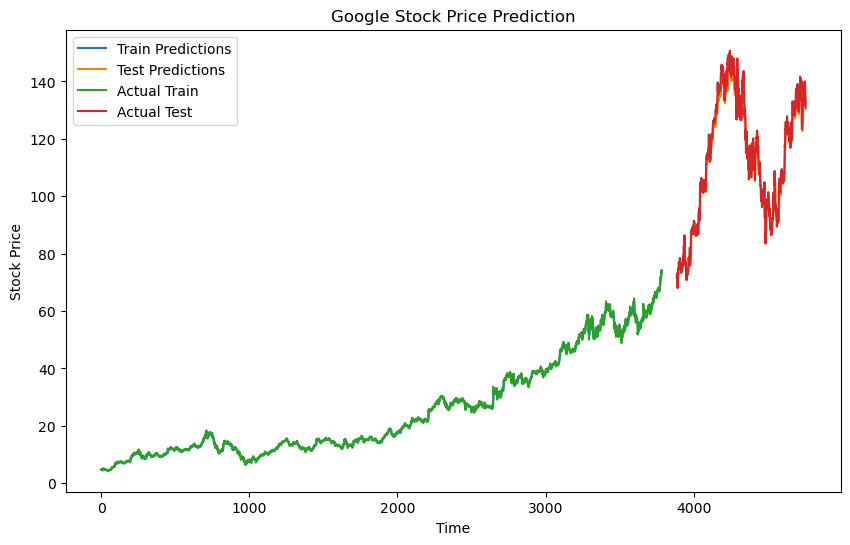

In [36]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index[:len(train_predictions)], train_predictions, label='Train Predictions')
plt.plot(data.index[len(train_predictions)+time_step:len(train_predictions)+time_step+len(test_predictions)], test_predictions, label='Test Predictions')
plt.plot(data.index[:len(y_train.flatten())], y_train.flatten(), label='Actual Train')
plt.plot(data.index[len(y_train.flatten())+time_step:len(y_train.flatten())+time_step+len(y_test.flatten())], y_test.flatten(), label='Actual Test')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()